# 회귀분석
## 단순회귀분석
한 개의 **종속변수(Y)**와 한 개의 **독립변수(X)** 사이의 관계를 분석하는 통계 기법<br>
=> Y와 X간의 관계를 일차식(선형)에 대입하여, X의 변화에 따라 Y가 얼마나 변하는지를 예측할 때 사용

## 회귀분석 기본 과정
- 선형성 : 독리변수(X)와 종속변수(Y)는 선형관계이다.
- 독립성 : 종속변수 Y는 서로 독립이어야 한다. (한 관측 값이 다른 관측치에 의해 영향을 받으면 안됨)
- 등분산성 : 독립변수 X의 값에 관계없이 종속변수 Y의 분산은 일정하다.
- 정규성 : 독립변수 X의 고정된 어떤 값에 대하여 종속변수 Y는 정규분포를 따른다.

## 최소제곱법(OLS)
잔차의 제곱의 합을 최소화

## 결정계수($R^2$)
전체 제곱합(SST) = 회귀 제곱합(SSR) + 잔차 제곱합(SSE)

## t 검정
단순회귀계수를 검정할 때, 개별회귀계수의 통계적 유의성은 t 검정으로 확인

## 다중회귀분석
단순회귀분석의 확장으로 **독립변수가** **두 개 이상**인 회귀모형에 대한 분석
- 다중선형회귀모델 : $Y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_kX_{ki} + e_i$ (단, $i = 1, 2, \cdots, n$)
- 단순회귀와의 차이점 : 단일 개의 독립변수가 아닌 *여러 개의 독립변수를 사용*
- 다중공선성 :
    - 다중선형회귀분석 : 각 독립변수 간 *독립성* 가정
    - **다중공선성** : *독립변수 간 상관성 존재*를 의미 -> 독립성 x<br>
        => 여러 개의 독립변수가 존재할 때 종속변수의 영향을 주는 독립변수를 찾는 것이 중요하며 *최적의 변수 선택의 필요*

## 이차회귀모델
비선형성을 고려한 이차회귀분석

## 다항회귀모델
3차, 4차 등과 같은 다항회귀모델이 있음
- 2차 이상의 회귀 모형
- 변수 간 상호작용 가능(Interaction)
- 장점 : 비선형적 추세를 고려할 수 있음
> 데이터에 따라서 Log나 차분을 통한 선형화로 계산을 용이하게 할 수 있음

# 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm    # 회귀분석

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

X = boston.data
boston_df = pd.DataFrame(X, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 단순 회귀
### 산점도로 변수간 관계 파악

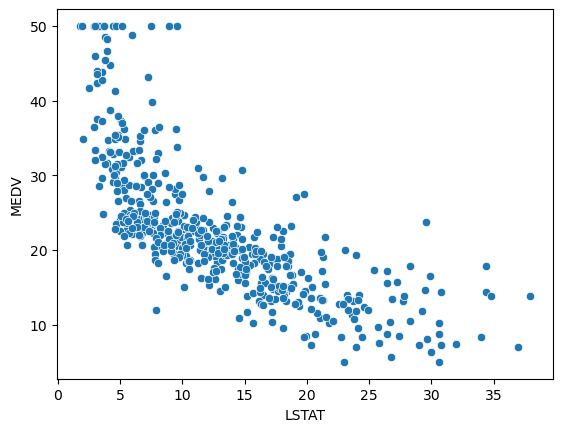

In [3]:
sns.scatterplot(x=boston_df['LSTAT'], y=boston_df['MEDV'])
plt.show()

In [5]:
MEDV = boston_df['MEDV'].values
LSTAT = boston_df['LSTAT'].values

### 독립변수에 상수항 결합

In [7]:
LSTAT = sm.add_constant(LSTAT)
LSTAT

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

### 단순 선형 회귀 분석

In [8]:
linear_mod = sm.OLS(MEDV, LSTAT)
linear_mod

In [9]:
linear_result = linear_mod.fit()
linear_result

In [10]:
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           5.08e-88
Time:                        09:11:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [12]:
np.sqrt(linear_result.fvalue)

24.527899851187733

In [15]:
linear_mod = sm.OLS.from_formula("MEDV ~ LSTAT", data=boston_df)
linear_result = linear_mod.fit()

In [16]:
print(linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           5.08e-88
Time:                        09:14:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### 잔차 확인

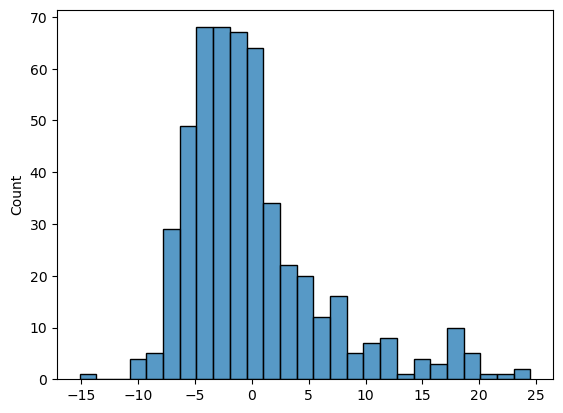

In [17]:
sns.histplot(linear_result.resid)
plt.show()

## 선형화를 통한 회귀분석
### 상관관계 및 분포 확인

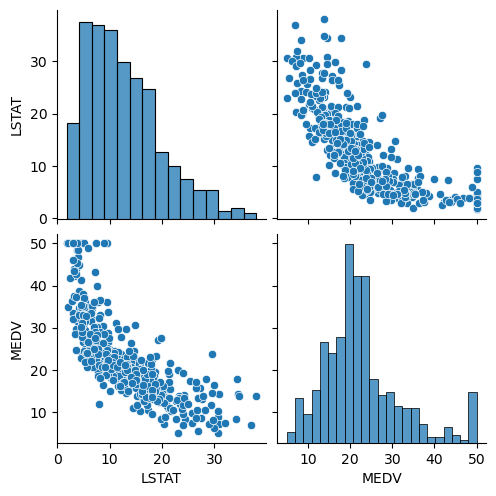

In [19]:
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

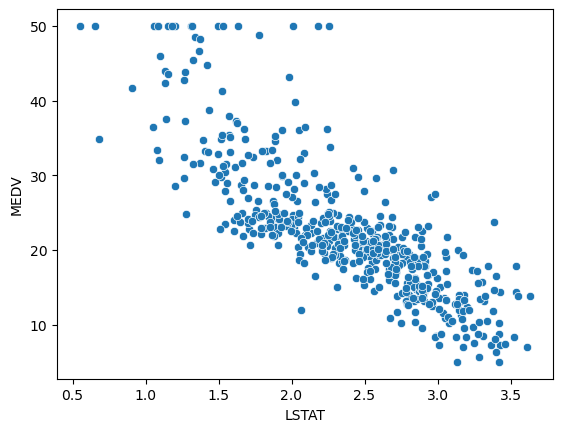

In [20]:
sns.scatterplot(x=np.log(boston_df['LSTAT']), y=boston_df['MEDV'])
plt.show()

### 회귀 분석

In [21]:
log_linear_mod = sm.OLS.from_formula("MEDV ~ np.log(LSTAT)", data=boston_df)
log_linear_result = log_linear_mod.fit()

In [22]:
print(log_linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          9.28e-122
Time:                        13:43:33   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

## 2차 회귀 분석 (Quadrratic Regression Model)

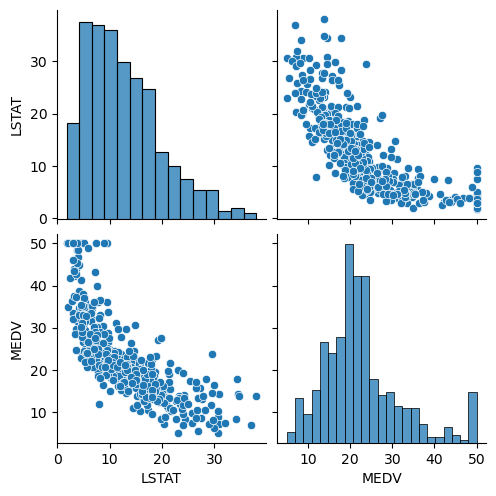

In [23]:
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

- 두 변수간 커브 모양의 관계형성 확인 -> 이를 고려하기 위해 `LSTAT` 변수의 2차항을 추가

In [24]:
quadratic_mod = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT ** 2)", data=boston_df)
quadratic_result = quadratic_mod.fit()
print(quadratic_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.56e-112
Time:                        13:47:32   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

### 잔차 확인

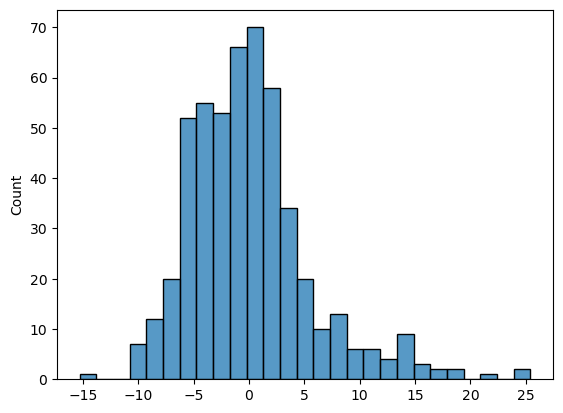

In [25]:
sns.histplot(quadratic_result.resid)
plt.show()

## 3개 모델 결과 비교 (선형 vs Log-Linear vs 2차 회귀)

In [26]:
print("Linear Model :", np.round(linear_result.rsquared, 2))
print("Log-Linear Model :", np.round(log_linear_result.rsquared, 2))
print("Quadratic Model :", np.round(quadratic_result.rsquared, 2))

Linear Model : 0.54
Log-Linear Model : 0.66
Quadratic Model : 0.64


## 다중 회귀 (Multiple Regression)

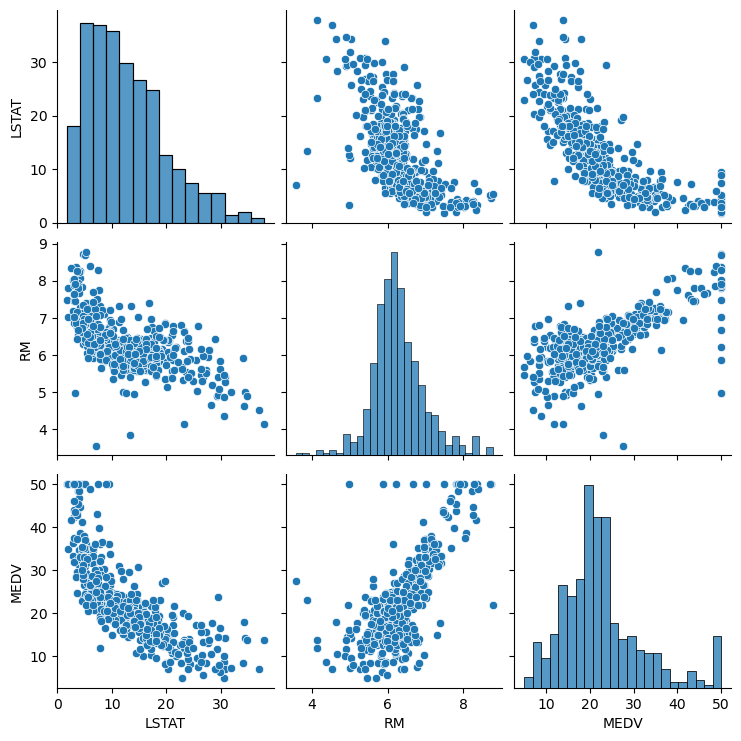

In [27]:
sns.pairplot(boston_df[['LSTAT', 'RM', 'MEDV']])
plt.show()

In [28]:
multi_model = sm.OLS.from_formula("MEDV ~ RM + LSTAT + I(LSTAT ** 2)", data=boston_df)
multi_result = multi_model.fit()

print(multi_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     396.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          6.50e-132
Time:                        13:51:30   Log-Likelihood:                -1533.0
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     502   BIC:                             3091.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.6896      3.138      3.725

### 잔차 확인

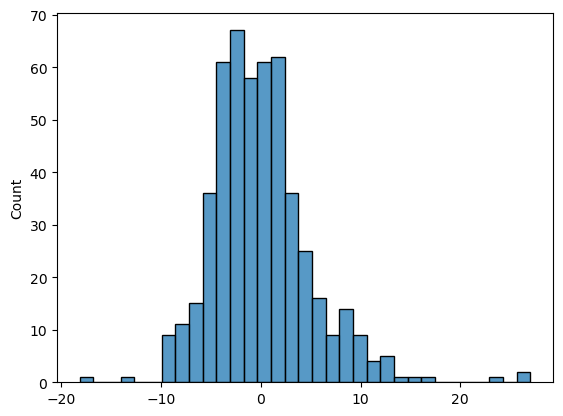

In [29]:
sns.histplot(multi_result.resid)
plt.show()

### 로그항 추가 (2차항 제거)

In [30]:
multi_model2 = sm.OLS.from_formula("MEDV ~ RM + np.log(LSTAT)", data=boston_df)
multi_result2 = multi_model2.fit()

print(multi_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     607.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.40e-135
Time:                        13:52:56   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     503   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.8865      3.552      6.443

#### 잔차 확인

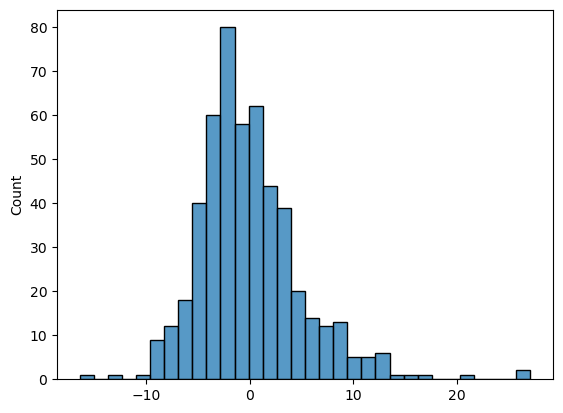

In [31]:
sns.histplot(multi_result2.resid)
plt.show()

## 성능 확인

In [34]:
print("Multiple Regression Model (2차항 포함) : {:.3f}".format(multi_result.rsquared))
print("Multiple Regression Model (로그 변환항 포함) : {:.3f}".format(multi_result2.rsquared))

Multiple Regression Model (2차항 포함) : 0.703
Multiple Regression Model (로그 변환항 포함) : 0.707
